In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
Pi = 5000 #psi

q = 2000 #stb/d

h = 50 #ft

phi = 0.24

ct = 14.8E-6

Bo = 1.5 #rb/stb

mu = 0.3 #cp, oil

rw = 0.29 #ft

In [32]:
df = pd.read_csv('/Users/steveadjorlolo/Desktop/Data.csv')

In [33]:
df['t_1/2'] = np.sqrt(df['t'])
df['t_1/4'] = np.sqrt(df['t_1/2'])

In [34]:
df.head()

,t,FBHP(psia),t_1/2,t_1/4
0,0.00000,5000.00,0.000000,0.000000
1,0.01002,4980.61,0.100100,0.316386
2,0.01209,4978.68,0.109955,0.331594
3,0.01420,4976.57,0.119164,0.345201
4,0.01730,4974.24,0.131529,0.362670


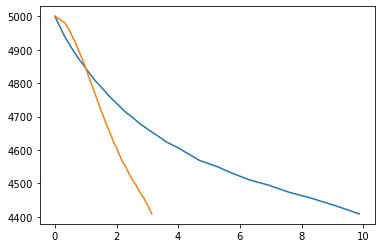

In [38]:
plt.plot(df['t_1/2'] , df['FBHP(psia)'])
plt.plot(df['t_1/4'] , df['FBHP(psia)'])

In [39]:
df['dP'] = np.zeros(len(df))
df['dt'] = np.zeros(len(df))

In [40]:
df['dP'] = Pi - df['FBHP(psia)']

In [42]:
df['dt'].loc[1:] =df['t'].diff()

In [43]:
df['d(dP)'] = np.zeros(len(df))

df['d(dP)'].loc[1:] = df['dP'].diff()

df['t*d(dP)/dt'] = np.zeros(len(df))

In [44]:
df['t*d(dP)/dt'].loc[1:] = df['d(dP)']*df['t']/df['dt']

In [46]:
df.head(10)

,t,FBHP(psia),t_1/2,t_1/4,dP,dt,d(dP),t*d(dP)/dt
0,0.00000,5000.00,0.000000,0.000000,0.00,0.00000,0.00,0.000000
1,0.01002,4980.61,0.100100,0.316386,19.39,0.01002,19.39,19.390000
2,0.01209,4978.68,0.109955,0.331594,21.32,0.00207,1.93,11.272319
3,0.01420,4976.57,0.119164,0.345201,23.43,0.00211,2.11,14.200000
4,0.01730,4974.24,0.131529,0.362670,25.76,0.00310,2.33,13.002903
5,0.02090,4971.98,0.144568,0.380221,28.02,0.00360,2.26,13.120556
6,0.02520,4969.20,0.158745,0.398428,30.80,0.00430,2.78,16.292093
7,0.03080,4966.14,0.175499,0.418926,33.86,0.00560,3.06,16.830000
8,0.03680,4963.17,0.191833,0.437988,36.83,0.00600,2.97,18.216000
9,0.04360,4959.52,0.208806,0.456953,40.48,0.00680,3.65,23.402941


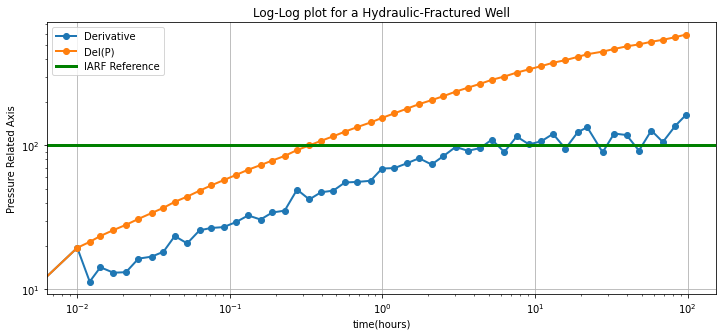

In [47]:
plt.figure(figsize=(12,5))
plt.style.use('default')

plt.loglog(df['t'], df['t*d(dP)/dt'],linewidth=2, marker='o', label = 'Derivative')
plt.loglog(df['t'], df['dP'],linewidth=2, marker='o',label='Del(P)')

plt.axhline(y=100, color='green',linewidth=3, label='IARF Reference')

plt.title('Log-Log plot for a Hydraulic-Fractured Well')

plt.xlabel('time(hours)')
plt.ylabel('Pressure Related Axis')

plt.legend(loc='best')


plt.grid()


In [48]:
# around 0.1 to 100 hours, we have a good scene to plot conventional.
#Radial flow around y = 100 value
#Linear flow around 0.1 to 1 hour

In [49]:
#Finding K from the radial flow regime
#100 = 70.6*q*mu*B/kh

k = 70.6*q*mu*Bo/100/h

print(f'The Permeability of un-altered Reservoir is : {k} mD!')

The Permeability of un-altered Reservoir is : 12.708 mD!


In [112]:
#Finding the fracure Half length

hf = df[(df['t']>0.1) & (df['t']<1)][['t_1/2','FBHP(psia)']]

c , m = np.polyfit(hf['t_1/2'] , hf['FBHP(psia)'] , 1)


In [113]:
x = hf['t_1/2']

y =c*x + m


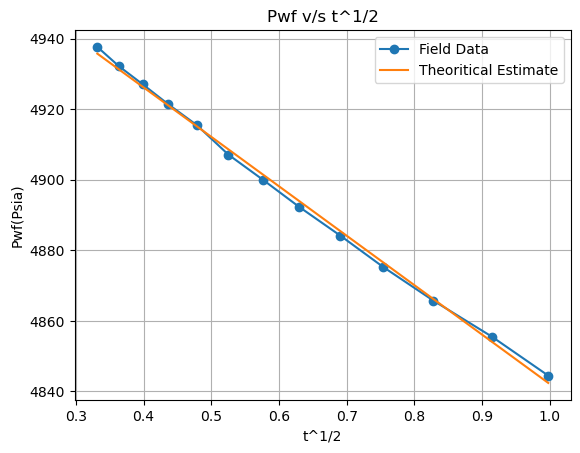

In [114]:
plt.plot(hf['t_1/2'], hf['FBHP(psia)'], marker='o', label='Field Data')
plt.plot(x,y,label='Theoritical Estimate')

plt.grid()

plt.title('Pwf v/s t^1/2')
plt.xlabel('t^1/2')
plt.ylabel('Pwf(Psia)')

plt.legend(loc='best')


In [115]:
c , m = np.polyfit(hf['t_1/2'] , hf['FBHP(psia)'] , 1)

In [116]:
c, m

(-140.2031328640003, 4982.259877030022)

In [117]:
# The slope gives Fracture Half length.

xf =(-1)*(4.06*q*Bo/(h*c))*np.sqrt(mu/k/phi/ct)

In [118]:
print('RESULTS of Analysis:\n')
print(f'1. Permeability of unaltered formation : {k} mD.\n')
print(f'2. Fracture Half Length : {xf} ft.')

RESULTS of Analysis:

1. Permeability of unaltered formation : 12.708 mD.

2. Fracture Half Length : 141.6462598634771 ft.


In [ ]:
#RESULTS of Analysis:

#1. Permeability of unaltered formation : 12.708 mD.

#2. Fracture Half Length : 141.64625986347212 ft.